In [127]:
import pandas as pd
import os

In [128]:
cwd = os.path.abspath('')
data_raw = pd.read_csv(fr'{cwd}\data\crops\crops.csv')

In [129]:
data_raw.rename(columns={'label': 'class'}, inplace=True)

In [130]:
data_raw

,N,P,K,temperature,humidity,ph,rainfall,class
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [131]:
data = data_raw.copy()
for col in data_raw.columns:
    if col == 'class':
        continue
    data[col] = pd.cut(data[col], bins=5)

In [132]:
for col in data.columns:
    values  = "\n".join([str(v) for v in set(data[col].values)])
    print(f'{col} values:\n{values}\n')

N values:
(-0.14, 28.0]
(56.0, 84.0]
(84.0, 112.0]
(112.0, 140.0]
(28.0, 56.0]

P values:
(61.0, 89.0]
(33.0, 61.0]
(89.0, 117.0]
(4.86, 33.0]
(117.0, 145.0]

K values:
(165.0, 205.0]
(45.0, 85.0]
(4.8, 45.0]

temperature values:
(15.796, 22.766]
(29.736, 36.706]
(22.766, 29.736]
(8.791, 15.796]
(36.706, 43.675]

humidity values:
(31.403, 48.548]
(65.692, 82.837]
(14.172, 31.403]
(48.548, 65.692]
(82.837, 99.982]

ph values:
(8.649, 9.935]
(4.791, 6.077]
(3.498, 4.791]
(6.077, 7.363]
(7.363, 8.649]

rainfall values:
(19.933, 75.881]
(187.221, 242.89]
(242.89, 298.56]
(131.551, 187.221]
(75.881, 131.551]

class values:
banana
mungbean
papaya
jute
mothbeans
rice
grapes
coconut
chickpea
maize
coffee
lentil
orange
blackgram
pigeonpeas
cotton
mango
watermelon
apple
pomegranate
muskmelon
kidneybeans



In [133]:
data = data_raw.copy()
for col in data_raw.columns:
    if col == 'class':
        continue
    data[col] = pd.cut(data[col], bins=5, labels=['low', 'medium low', 'medium', 'medium high', 'high'])

In [134]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,class
0,medium high,medium low,low,medium low,medium high,medium,medium high,rice
1,medium high,medium low,low,medium low,medium high,medium,medium high,rice
2,medium,medium low,low,medium,medium high,medium high,high,rice
3,medium,medium low,low,medium,medium high,medium,medium high,rice
4,medium,medium low,low,medium low,medium high,medium high,high,rice


([<matplotlib.patches.Wedge at 0x1b3e2c8cec0>,
 [Text(1.0888035854028022, 0.15654632673430227, 'rice - 100 instances'),
  Text(1.0005951890558762, 0.4569565270769591, 'maize - 100 instances'),
  Text(0.8313245164615624, 0.7203468250294088, 'jute - 100 instances'),
  Text(0.5947048716338131, 0.9253789038307552, 'cotton - 100 instances'),
  Text(0.3099057721001755, 1.055442282845914, 'coconut - 100 instances'),
  Text(-5.149471629032507e-08, 1.0999999999999988, 'papaya - 100 instances'),
  Text(-0.3099058709178122, 1.0554422538304369, 'orange - 100 instances'),
  Text(-0.5947049582740361, 0.9253788481504627, 'apple - 100 instances'),
  Text(-0.8313245839052957, 0.7203467471951874, 'muskmelon - 100 instances'),
  Text(-1.0005952318392295, 0.4569564333944747, 'watermelon - 100 instances'),
  Text(-1.0888036000597223, 0.1565462247931527, 'grapes - 100 instances'),
  Text(-1.0888035707458725, -0.15654642867545038, 'mango - 100 instances'),
  Text(-1.000595146272514, -0.45695662075943977, 'ba

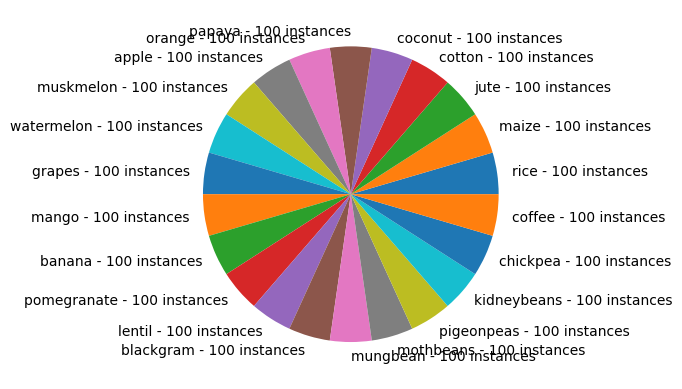

In [135]:
import matplotlib.pyplot as plt
counted = data['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


In [136]:
conditional_df = data.drop(columns=['class'])
conditional_df.duplicated().any()

True

In [137]:
class_labels = {}
class_values = list(data['class'].values)
for clas in set(data['class'].values):
    class_labels[clas] = class_values.count(clas)

In [138]:
# duplicates = conditional_df[conditional_df.duplicated(keep=False)]

In [140]:
for val, group in data.groupby(list(conditional_df.columns)):
    decisions = set(group['class'].values)
    if len(decisions) == 1:
        print(len(decisions))
    else:
        most_common_decision = None
        occurences = 0
        for decision in decisions:
            occ = len(group[group['class'] == decision])
            if occ > occurences:
                occurences = occ
                most_common_decision = decision
        print(f'{most_common_decision}, {occurences}: {decisions}')
        data.loc[group.index, 'class'] = most_common_decision

1
1
pomegranate, 9: {'orange', 'pomegranate'}
pomegranate, 34: {'orange', 'pomegranate'}
1
1
1
1
1
1
pomegranate, 8: {'coconut', 'pomegranate'}
1
1
pomegranate, 20: {'coconut', 'orange', 'pomegranate'}
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
lentil, 4: {'lentil', 'mothbeans', 'blackgram'}
1
1
1
mungbean, 15: {'lentil', 'blackgram', 'mungbean'}
1
1
1
1
1
1
1
mango, 2: {'pigeonpeas', 'mango'}
1
1
1
1
1
1
1
1
1
1
1
1
1
blackgram, 1: {'blackgram', 'mungbean'}
lentil, 1: {'lentil', 'blackgram'}
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
lentil, 16: {'lentil', 'blackgram'}
1
lentil, 7: {'lentil', 'blackgram'}
1
lentil, 8: {'lentil', 'blackgram'}
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
lentil, 3: {'lentil', 'blackgram'}
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
pomegranate, 8: {'orange', 'pomegranate'}
1
1
1
1
1
1
1
pomegranate, 10: {'coconut', 'orange', 'pomegranate'}
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
bl

C:\Users\Anna\AppData\Local\Temp\ipykernel_15476\1627723836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for val, group in data.groupby(list(conditional_df.columns)):


In [141]:
data.drop_duplicates(inplace=True)

In [142]:
data.drop(columns=['class']).duplicated().any()

False

Niespójności usunięte - w przypadku niespójności została przypisana najczęściej występująca decyzja w podgrupie (podzielonej ze względu na atrybuty warunkowe)